## 배수 구하기, 입력: 1개, 출력: 1개
- 배수의 규칙을 학습시키고 어떤수를 전달하여 배수를 구하게 할 것임.
- 수를 모르는 AI는 수의 배수의 규칙을 알아낸 후 수를 예측하게됨
- 인간의 학습 경로: 숫자 학습 -> 사칙연산 학습

In [2]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

# tensorflow 1.x, Keras가 독립적으로 설치된 경우
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class
# from keras.optimizers import Adam    # 가중치, bias 최적화

# tensorflow 1.2~
# from tensorflow.keras.models import Sequential  # class
# from tensorflow.keras.models import load_model  # model 파일 로딩
# from tensorflow.keras.layers import Dense       # 전결합층
# from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [3]:
print([i for i in range(1, 21)])
x_train = np.array([i for i in range(1, 21)]) # 데이터
print(x_train) # 독립 변수
y_train = np.array([i*2 for i in range(1, 21)]) # 정답, 실제값, Target
print(y_train) # 종속 변수

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]


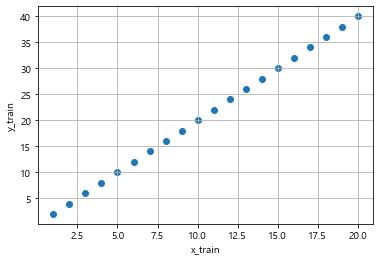

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

In [5]:
# model 제작
try:
    if model != None:
        print('model 객체 삭제')
        del model
except:
    pass

model = Sequential() # 객체 생성
# Dense: 전결합층, 1: 출력노드(뉴런), input_dim=1: 입력 데이터 종류 수
# activation='linear': 선형회귀
model.add(Dense(1, input_dim=1, activation='linear'))
# optimizer='adam': 오차 역전파(weight(기울기), bias(편향) update)차
# loss='mse': 손실 측정 함수
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


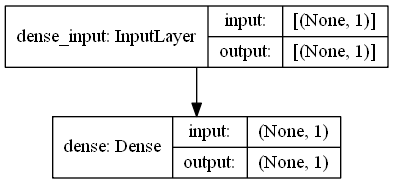

In [6]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [7]:
# 훈련
# x_train: 독립 변수 -> y_train: 종속 변수, 찾아야 할 값, target, yhat
# validation_split=0.2: 훈련데이터에서 20% 분리하여 훈련시 검증 데이터로 사용
# shuffle=True: 데이터를 무작위로 추출되도록 섞는 역활을 함
# epochs=300: 전체 데이터를 300번 학습을 진행하는 설정
# batch_size=1: 데이터 1건을 읽어서 가중치와 편향을 변경한다.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Epoch 1/300
16/16 [==============================] - 1s 39ms/step - loss: 463.9783 - val_loss: 1628.0867
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 331.4487 - val_loss: 1610.4983
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 554.9261 - val_loss: 1590.1477
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 346.5086 - val_loss: 1572.5763
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 376.6746 - val_loss: 1554.3920
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 526.8384 - val_loss: 1535.3566
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 383.5081 - val_loss: 1517.8646
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 425.6419 - val_loss: 1499.2795
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 435.3806 - val_loss: 1481.2279
Epoch 10/300
16/16 [==============================] - 0s 4ms/st

16/16 [==============================] - 0s 4ms/step - loss: 207.1170 - val_loss: 571.6194
Epoch 80/300
16/16 [==============================] - 0s 4ms/step - loss: 151.5997 - val_loss: 563.8716
Epoch 81/300
16/16 [==============================] - 0s 4ms/step - loss: 142.1074 - val_loss: 554.5983
Epoch 82/300
16/16 [==============================] - 0s 4ms/step - loss: 107.4395 - val_loss: 546.9194
Epoch 83/300
16/16 [==============================] - 0s 4ms/step - loss: 151.9882 - val_loss: 537.9636
Epoch 84/300
16/16 [==============================] - 0s 4ms/step - loss: 142.1038 - val_loss: 529.4128
Epoch 85/300
16/16 [==============================] - 0s 4ms/step - loss: 152.0491 - val_loss: 520.8116
Epoch 86/300
16/16 [==============================] - 0s 4ms/step - loss: 107.5576 - val_loss: 513.2675
Epoch 87/300
16/16 [==============================] - 0s 4ms/step - loss: 124.4681 - val_loss: 505.1188
Epoch 88/300
16/16 [==============================] - ETA: 0s - loss: 135.408

16/16 [==============================] - 0s 4ms/step - loss: 23.4626 - val_loss: 138.9883
Epoch 158/300
16/16 [==============================] - 0s 4ms/step - loss: 26.5537 - val_loss: 135.8512
Epoch 159/300
16/16 [==============================] - 0s 4ms/step - loss: 29.5425 - val_loss: 132.9517
Epoch 160/300
16/16 [==============================] - 0s 3ms/step - loss: 29.8564 - val_loss: 130.0359
Epoch 161/300
16/16 [==============================] - 0s 4ms/step - loss: 35.6140 - val_loss: 127.2423
Epoch 162/300
16/16 [==============================] - 0s 4ms/step - loss: 33.6832 - val_loss: 124.4242
Epoch 163/300
16/16 [==============================] - 0s 3ms/step - loss: 26.7679 - val_loss: 121.8283
Epoch 164/300
16/16 [==============================] - 0s 4ms/step - loss: 16.9921 - val_loss: 119.3396
Epoch 165/300
16/16 [==============================] - 0s 4ms/step - loss: 32.0638 - val_loss: 116.4443
Epoch 166/300
16/16 [==============================] - 0s 4ms/step - loss: 20.

16/16 [==============================] - 0s 4ms/step - loss: 4.3645 - val_loss: 19.2442
Epoch 237/300
16/16 [==============================] - 0s 4ms/step - loss: 2.4635 - val_loss: 18.8172
Epoch 238/300
16/16 [==============================] - 0s 4ms/step - loss: 3.2497 - val_loss: 18.2883
Epoch 239/300
16/16 [==============================] - 0s 4ms/step - loss: 2.0602 - val_loss: 17.8334
Epoch 240/300
16/16 [==============================] - 0s 4ms/step - loss: 2.7727 - val_loss: 17.3527
Epoch 241/300
16/16 [==============================] - 0s 4ms/step - loss: 2.7925 - val_loss: 16.8769
Epoch 242/300
16/16 [==============================] - 0s 4ms/step - loss: 2.1560 - val_loss: 16.4148
Epoch 243/300
16/16 [==============================] - 0s 4ms/step - loss: 2.9098 - val_loss: 15.9511
Epoch 244/300
16/16 [==============================] - 0s 3ms/step - loss: 2.6884 - val_loss: 15.4912
Epoch 245/300
16/16 [==============================] - 0s 4ms/step - loss: 2.1444 - val_loss: 15

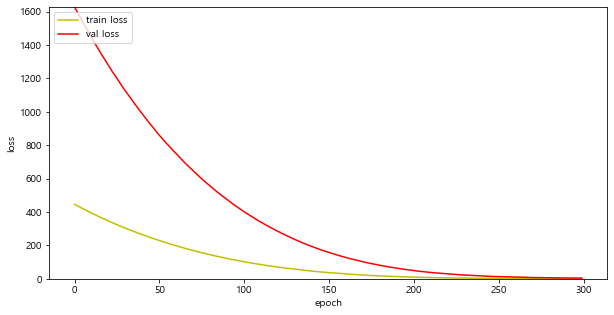

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1628.0867]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [12]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55 ])
print(x.shape)
y = x * 2  # 비교 목적
print('찾아야할 값:', y)
p = model.predict(x) # 모델 사용
print(type(p))
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[92.771835]
 [94.54987 ]
 [96.32792 ]
 [98.10596 ]
 [99.883995]]


In [13]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 92.7718353271, 정제된값: 93
x: 52, 실제값: 104, 예측값: 94.5498733521, 정제된값: 95
x: 53, 실제값: 106, 예측값: 96.3279190063, 정제된값: 96
x: 54, 실제값: 108, 예측값: 98.1059570312, 정제된값: 98
x: 55, 실제값: 110, 예측값: 99.8839950562, 정제된값: 100


### 학습이 이루어지고는 있으나 노드가 1개라서 학습 능력이 매우 떨어짐(과소 적합).

In [15]:
# model 제작
try:
    if model != None:
        print('model 객체 삭제')
        del model
except:
    pass

model = Sequential() # 객체 생성
# Dense: 전결합층, 10: 출력노드(뉴런), input_dim=1: 입력 데이터 종류 수
# activation='linear': 선형회귀
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력값: 10, 가중치: 10, bias: 1 
# optimizer='adam': 오차 역전파(weight(기울기), bias(편향) update)차
# loss='mse': 손실 측정 함수
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인

model 객체 삭제
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


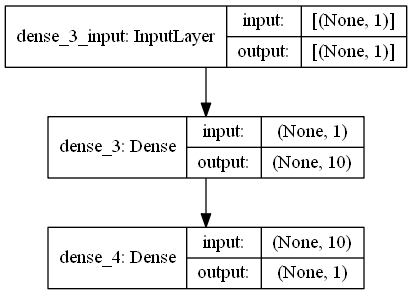

In [16]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [17]:
# 훈련
# x_train: 독립 변수 -> y_train: 종속 변수, 찾아야 할 값, target, yhat
# validation_split=0.2: 훈련데이터에서 20% 분리하여 훈련시 검증 데이터로 사용
# shuffle=True: 데이터를 무작위로 추출되도록 섞는 역활을 함
# epochs=300: 전체 데이터를 300번 학습을 진행하는 설정
# batch_size=1: 데이터 1건을 읽어서 가중치와 편향을 변경한다.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Epoch 1/300
16/16 [==============================] - 0s 13ms/step - loss: 163.4122 - val_loss: 709.6614
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 201.7017 - val_loss: 617.4222
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 170.6178 - val_loss: 539.1921
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 150.8637 - val_loss: 469.5819
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 151.5736 - val_loss: 396.5215
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 121.1513 - val_loss: 337.2747
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 102.8817 - val_loss: 283.9290
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 73.0501 - val_loss: 236.2316
Epoch 9/300
16/16 [==============================] - 0s 3ms/step - loss: 40.1997 - val_loss: 196.9059
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss: 

16/16 [==============================] - 0s 4ms/step - loss: 0.1335 - val_loss: 0.3212
Epoch 83/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2043 - val_loss: 0.3023
Epoch 84/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1494 - val_loss: 0.3283
Epoch 85/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1220 - val_loss: 0.2822
Epoch 86/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1062 - val_loss: 0.2808
Epoch 87/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1214 - val_loss: 0.2687
Epoch 88/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1591 - val_loss: 0.2733
Epoch 89/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1012 - val_loss: 0.2713
Epoch 90/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1342 - val_loss: 0.2706
Epoch 91/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0944 - val_loss: 0.2478
Epoch 92/300


16/16 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.0415
Epoch 164/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0520
Epoch 165/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0382
Epoch 166/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0318
Epoch 167/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0434
Epoch 168/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0305
Epoch 169/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.0359
Epoch 170/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0180 - val_loss: 0.0408
Epoch 171/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0293
Epoch 172/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0275
Epoc

16/16 [==============================] - 0s 4ms/step - loss: 3.8806e-04 - val_loss: 5.6914e-04
Epoch 244/300
16/16 [==============================] - 0s 4ms/step - loss: 4.3520e-04 - val_loss: 7.4111e-04
Epoch 245/300
16/16 [==============================] - 0s 4ms/step - loss: 2.0974e-04 - val_loss: 8.0108e-04
Epoch 246/300
16/16 [==============================] - 0s 4ms/step - loss: 4.0366e-04 - val_loss: 6.7837e-04
Epoch 247/300
16/16 [==============================] - 0s 4ms/step - loss: 4.5794e-04 - val_loss: 6.6138e-04
Epoch 248/300
16/16 [==============================] - 0s 3ms/step - loss: 2.5536e-04 - val_loss: 4.3250e-04
Epoch 249/300
16/16 [==============================] - 0s 4ms/step - loss: 2.0633e-04 - val_loss: 5.2182e-04
Epoch 250/300
16/16 [==============================] - 0s 3ms/step - loss: 2.4550e-04 - val_loss: 5.6165e-04
Epoch 251/300
16/16 [==============================] - 0s 4ms/step - loss: 2.3716e-04 - val_loss: 4.2852e-04
Epoch 252/300
16/16 [============

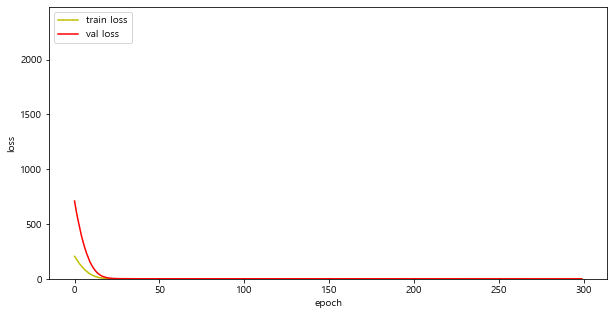

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2481.1538]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [20]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55])
print(x.shape)
y = x * 2  # 비교 목적
print('찾아야할 값:', y)
p = model.predict(x) # 모델 사용
print(type(p))
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[101.988785]
 [103.9885  ]
 [105.98821 ]
 [107.98792 ]
 [109.98765 ]]


In [21]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 101.9887847900, 정제된값: 102
x: 52, 실제값: 104, 예측값: 103.9885025024, 정제된값: 104
x: 53, 실제값: 106, 예측값: 105.9882125854, 정제된값: 106
x: 54, 실제값: 108, 예측값: 107.9879226685, 정제된값: 108
x: 55, 실제값: 110, 예측값: 109.9876480103, 정제된값: 110


### AI는 배수의 규칙을 학습 완료함.

In [23]:
# 사용자로부터 수를 입력받아 배수를 알려주는 AI 모델
src = int(input('배수를 구할 수를 입력하세요:'))
x = np.array([src])
y = x * 2 # 실제답, 비교 목적
p = model.predict(x) # 모델 사용, 2차원 배열로 예측 결과 발생
print(p)
fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
print(fmt.format(x[0], y, p[0][0], p[0][0]))

배수를 구할 수를 입력하세요:1000
[[1999.7188]]
x: 1000, 실제값: [2000], 예측값: 1999.7187500000, 정제된값: 2000
